In [1]:
from sklearn.datasets import make_moons,make_blobs,make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')


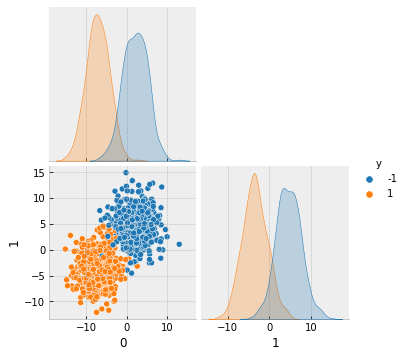

In [6]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,cluster_std=3,random_state=2021)
y[y==0]=-1
data = pd.DataFrame(X)
data['y'] = y
sns.pairplot(data,hue='y',palette='tab10', corner=True)

Text(0.5, 1.0, 'Test set')

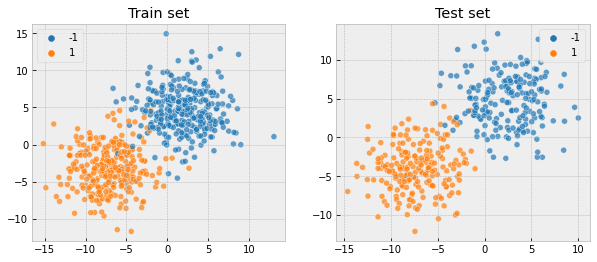

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 2021,test_size=0.4)
fig,ax = plt.subplots(1,2,figsize=(10,4))
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train,alpha=0.7,palette='tab10',ax=ax[0])
ax[0].set_title('Train set')
sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_test,alpha=0.7,palette='tab10',ax=ax[1])
ax[1].set_title('Test set')

In [8]:
models = {
    "Logistic Regression" :LogisticRegression(),
    "Gaussian naive Bayes": GaussianNB(),
    "K-nearest neighbors" :  KNeighborsClassifier(n_neighbors=20),
    "Linear Support Vector" :SVC(kernel="linear",probability=True,random_state=2022),
    "Radial Basis Support Vector" : SVC(kernel="rbf",probability=True,random_state=2022),
    "Decision Tree": DecisionTreeClassifier(min_samples_leaf=10,random_state=2022),
    "Ada Boost": AdaBoostClassifier(random_state=2021),
    "Random Forest (Bagging+)": RandomForestClassifier(min_samples_leaf=10,random_state=2022),
}

In [9]:
def decision_boundaries_plot(ax,mdl,X_train,X_test,Y_train,Y_test,title=None,cmap='PiYG',step_size=0.05):
    extent = np.array([np.min(X_train,axis=0)*1.1,np.max(X_train,axis=0)*1.1]).T.flatten()
    mdl.fit(X_train,Y_train)
    fs1, fs2 = np.meshgrid(np.arange(extent[0],extent[1], step_size),
                           np.arange(extent[2],extent[3], step_size))
    mesh = np.vstack([fs1.flatten(),fs2.flatten()])
    p = mdl.predict_proba(mesh.T)
    z = np.reshape(p[:,1]-p[:,0],fs1.shape)
    ax.imshow( z, cmap=cmap,alpha=0.5,origin='lower',extent=extent,aspect='auto',vmin=-1,vmax=1)
    ax.scatter(x=X_test[:,0],y=X_test[:,1],c=Y_test,alpha=0.7,cmap=cmap)
    ax.set_title(title)


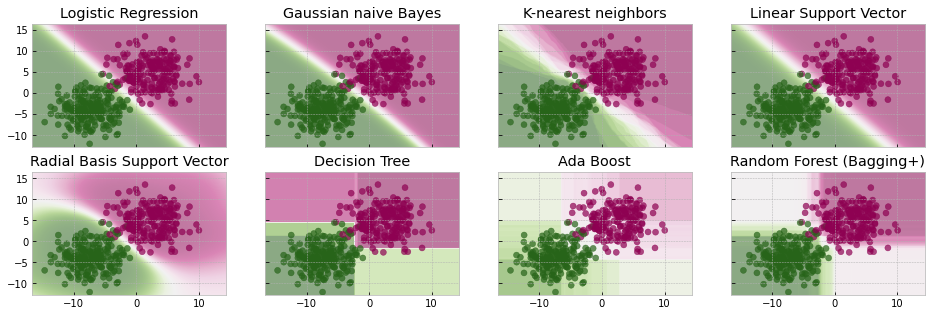

In [10]:
fig,ax = plt.subplots(2,4,sharey=True,sharex=True,figsize=(16,5))
for ix,(title,mdl) in enumerate(models.items()):
    i,j = np.unravel_index(ix, (2,4))
    decision_boundaries_plot(ax[i,j],mdl,X_train,X_test,y_train,y_test,title)
